In [1]:
import os 
import re
import numpy as np
import matplotlib.pyplot as plt

In [45]:
f = open(os.path.join('/home/anverdie/Data_Ephys/793616_D5_16092022', 'digitalin.dat'), 'rb') 
sd_array = np.fromfile(f, np.uint16)
f.close()

In [3]:
f = open(os.path.join('/home/anverdie/Data_Ephys/793616_D5_16092022', 'amplifier.dat'), 'rb') 
amp_array = np.fromfile(f, np.int16)
f.close()
amp_array = amp_array.reshape(-1, 64)
amp_array = amp_array.T

In [46]:
print(np.shape(sd_array))
a = np.where(np.insert(np.diff(sd_array), 0, 0) == 4)[0]
# For some reason there is 26 uknown pulses at the beginning of the recording
a = a[26:]

(78875280,)


In [48]:
# There should be 36 LED, 15 presentations, 4 intensities, 10 pulses = 21600

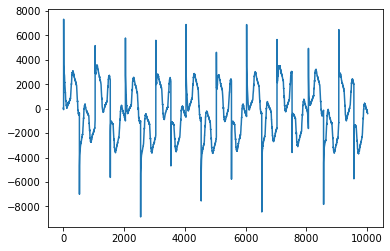

In [73]:
plt.plot(amp_array[37, a[9850]:a[9850]+10020])
plt.show()

In [ ]:
all_pres = np.array(np.mean([]) in amp_array[0])